**Installing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cosine


**Loading the datasets**

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")


**Dropping duplicates and removing missing value**

In [3]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


**Since there is no missing value , skipping the dropping part**

# **Exploratory Data Analysis**

**Customer Analysis**

Customer Distribution by Region


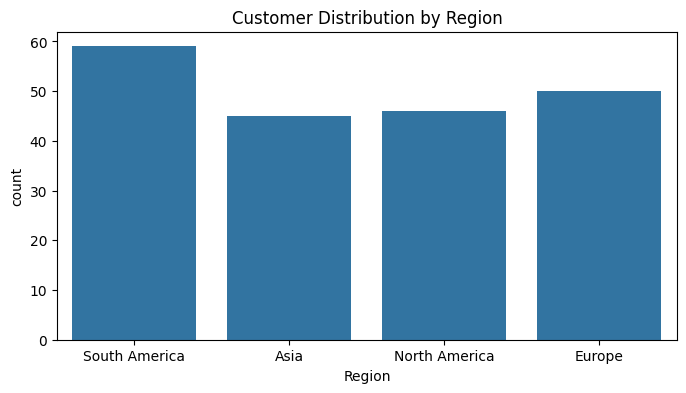

In [4]:
plt.figure(figsize=(8, 4))
sns.countplot(x="Region", data=customers)
plt.title("Customer Distribution by Region")
plt.show()


Customer Signup Trends


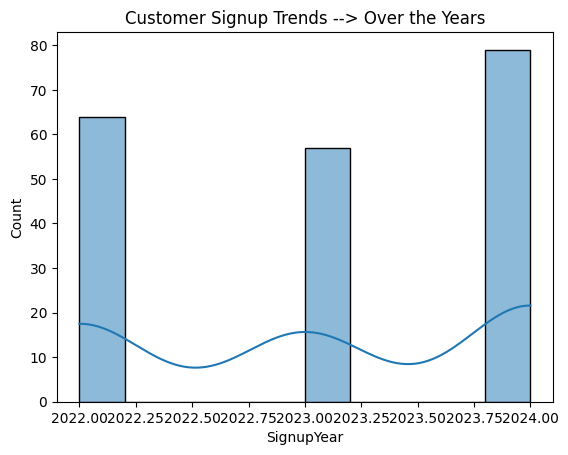

In [7]:
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"], errors='coerce')
customers["SignupYear"] = customers["SignupDate"].dt.year
sns.histplot(customers["SignupYear"], bins=10, kde=True)
plt.title("Customer Signup Trends --> Over the Years")
plt.show()




**Product analysis - To determine the best selling product and most profitable products**

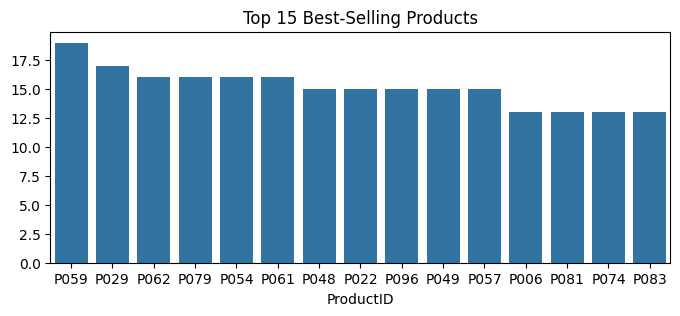

In [10]:
#Top selling products
top_products = transactions["ProductID"].value_counts().head(15)
plt.figure(figsize=(8, 3))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Top 15 Best-Selling Products")
plt.show()


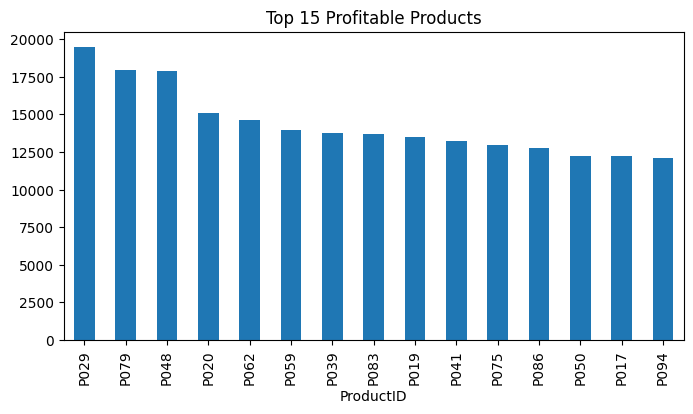

In [12]:
#Most profitable products
profit_per_product = transactions.groupby("ProductID")["TotalValue"].sum().sort_values(ascending=False).head(15)
profit_per_product.plot(kind="bar", figsize=(8, 4), title="Top 15 Profitable Products")
plt.show()


**Sales Trends Over Time-Transaction Analysis**

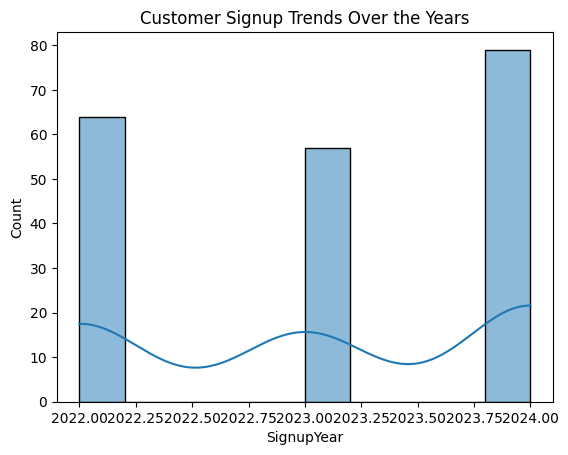

In [14]:
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"], errors='coerce')
customers["SignupYear"] = customers["SignupDate"].dt.year
sns.histplot(customers["SignupYear"], bins=10, kde=True)
plt.title("Customer Signup Trends Over the Years")
plt.show()
